# Notebook 2: MED-PC Calculating Latencies

## Importing the Python Libraries

In [1]:
import sys
import glob
from collections import defaultdict
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from medpc2excel.medpc_read import medpc_read
import matplotlib

In [3]:
# setting path
sys.path.append('../../src')

In [4]:
# All the libraries that were created for this repository
import extract.dataframe
import processing.tone
import extract.metadata

In [5]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (13.5,7.5)

In [6]:
import matplotlib

# Loading in Recording and Metadata from Previous Notebook

In [7]:
all_pilots_grouped_averaged_first_porty_entry_files = glob.glob("./**/*grouped_averaged_first_porty_entry*.csv", recursive=True)

In [8]:
all_pilots_grouped_averaged_first_porty_entry_df = pd.concat([pd.read_csv(file_path) for file_path in all_pilots_grouped_averaged_first_porty_entry_files])

In [9]:
all_pilots_grouped_averaged_first_porty_entry_df.head()

,Unnamed: 0,session,subject,current_tone_time,first_port_entry_after_tone,port_exit_after_first_port_entry_after_tone,last_port_entry_before_tone,port_exit_after_last_port_entry_before_tone,latency,latency_adjusted_greater_than_30,overlapping_port_entry_with_tone,latency_adjusted_overlap,adjusted_30_second_latency_less_than_10_seconds_ratio,overlap_adjusted_latency_less_than_10_seconds,cage,strain,cohort,subject_with_cage_number
0,0,1,1.1,675.676667,717.894667,718.904667,708.214615,708.941538,42.218000,19.980000,0.000000,19.980000,0.333333,0.333333,1,C57,pilot_1,NaN
1,1,1,1.2,721.885000,679.113571,681.099286,787.512143,790.962857,49.817857,27.120000,0.187500,22.605714,0.062500,0.187500,2,C57,pilot_1,NaN
2,2,1,1.3,721.885000,762.274667,764.120000,637.862500,640.833125,86.598000,27.746000,0.000000,27.746000,0.000000,0.000000,2,C57,pilot_1,NaN
3,3,1,1.4,675.676667,737.022000,737.790667,613.392000,614.831333,61.345333,22.285333,0.066667,21.607333,0.200000,0.266667,1,C57,pilot_1,NaN
4,4,1,2.1,721.885000,752.838125,757.749375,701.735625,703.736875,30.953125,17.701875,0.250000,12.203125,0.250000,0.437500,2,C57,pilot_1,NaN


## Plotting the average per strain

## Getting the averages for all the trials in one subject and one day

- We will plot a line for each subject. With the X-axis being the days since the first session. And the Y-axis is the latency values averaged across all the trials for one recording session
- Grouping all the rows with the same subject and date(aka, all the trials in one session). And then getting the mean for each value

In [10]:
strain_averaged_first_porty_entry_dataframe = all_pilots_grouped_averaged_first_porty_entry_df.groupby(by=["strain", "session"]).mean()

In [11]:
strain_averaged_first_porty_entry_dataframe

Unnamed: 0  current_tone_time  first_port_entry_after_tone  \
strain session                                                               
C57    1          5.000000        1509.510401                  1547.061594   
       2         26.071429        1799.410909                  1811.329695   
       3         46.375000        1796.953744                  1778.209011   
       4         68.375000        1796.953744                  1804.947744   
       5         90.375000        1791.223942                  1796.241379   
       6        112.375000        1779.753590                  1785.248357   
       7        134.375000        1791.223942                  1795.435500   
       8        156.375000        1791.223942                  1795.697367   
       9        166.900000        1798.106154                  1804.425709   
       10       187.700000        1807.273837                  1813.742175   
       11       163.500000        1825.635000                  1841.851906   
       12       177.500000        1825.635000                  1832.798563   
CD1    1         16.000000        1796.953744                  1850.945192   
       2         35.931034        1805.055610                  1815.187054   
       3         57.375000        1796.953744                  1776.808546   
       4         79.375000        1791.223942                  1806.529959   
       5        101.375000        1791.223942                  1810.875500   
       6        123.375000        1785.488766                  1791.525617   
       7        145.375000        1791.223942                  1796.263953   
       8        167.375000        1802.683546                  1771.733057   
       9        177.300000        1798.106154                  1804.903306   
       10       198.100000        1798.106154                  1802.153703   
       11       171.500000        1825.613502                  1832.891348   

                port_exit_after_first_port_entry_after_tone  \
strain session                                                
C57    1                                        1546.570342   
       2                                        1812.417057   
       3                                        1779.793839   
       4                                        1805.536697   
       5                                        1798.764235   
       6                                        1788.075529   
       7                                        1794.149501   
       8                                        1798.631930   
       9                                        1808.160791   
       10                                       1813.643327   
       11                                       1851.668312   
       12                                       1843.037750   
CD1    1                                        1852.284189   
       2                                        1815.660375   
       3                                        1779.069347   
       4                                        1808.490949   
       5                                        1812.549845   
       6                                        1793.457234   
       7                                        1797.966025   
       8                                        1773.073993   
       9                                        1806.475022   
       10                                       1804.654463   
       11                                       1836.751722   

                last_port_entry_before_tone  \
strain session                                
C57    1                        1492.577503   
       2                        1731.245201   
       3                        1752.402460   
       4                        1805.873637   
       5                        1785.338298   
       6                        1772.633974   
       7                        1786.613148   
       8                        1790.786818   
       9           

In [12]:
strain_sem_first_porty_entry_dataframe = all_pilots_grouped_averaged_first_porty_entry_df.groupby(by=["strain", "session"]).sem()

## Reformatting the Dataframe for plotting

- Resetting the index so that we can use the data as a value

In [13]:
strain_averaged_first_porty_entry_dataframe = strain_averaged_first_porty_entry_dataframe.reset_index()
strain_sem_first_porty_entry_dataframe = strain_sem_first_porty_entry_dataframe.reset_index()

In [14]:
strain_averaged_first_porty_entry_dataframe.head()

,strain,session,Unnamed: 0,current_tone_time,first_port_entry_after_tone,port_exit_after_first_port_entry_after_tone,last_port_entry_before_tone,port_exit_after_last_port_entry_before_tone,latency,latency_adjusted_greater_than_30,overlapping_port_entry_with_tone,latency_adjusted_overlap,adjusted_30_second_latency_less_than_10_seconds_ratio,overlap_adjusted_latency_less_than_10_seconds,cage,subject_with_cage_number
0,C57,1,5.000000,1509.510401,1547.061594,1546.570342,1492.577503,1493.465991,75.003358,20.544602,0.038351,19.987369,0.260527,0.279347,1.875,2.25
1,C57,2,26.071429,1799.410909,1811.329695,1812.417057,1731.245201,1796.069605,23.068194,14.115053,0.053981,13.835798,0.451316,0.459469,2.000,2.75
2,C57,3,46.375000,1796.953744,1778.209011,1779.793839,1752.402460,1753.342934,34.139699,11.134368,0.095812,10.697475,0.601212,0.614578,1.875,2.25
3,C57,4,68.375000,1796.953744,1804.947744,1805.536697,1805.873637,1806.930649,7.994000,6.867833,0.129054,6.217688,0.774101,0.794501,1.875,2.25
4,C57,5,90.375000,1791.223942,1796.241379,1798.764235,1785.338298,1786.955018,5.017437,4.862606,0.201302,3.993671,0.884675,0.906010,1.875,2.25


In [15]:
strain_averaged_first_porty_entry_dataframe.groupby(["strain"]).max()

,session,Unnamed: 0,current_tone_time,first_port_entry_after_tone,port_exit_after_first_port_entry_after_tone,last_port_entry_before_tone,port_exit_after_last_port_entry_before_tone,latency,latency_adjusted_greater_than_30,overlapping_port_entry_with_tone,latency_adjusted_overlap,adjusted_30_second_latency_less_than_10_seconds_ratio,overlap_adjusted_latency_less_than_10_seconds,cage,subject_with_cage_number
strain,,,,,,,,,,,,,,,
C57,12,187.7,1825.635000,1841.851906,1851.668312,1873.034669,1881.306082,75.003358,20.544602,0.491424,19.987369,0.884675,0.987500,2.000,2.75
CD1,11,198.1,1825.613502,1850.945192,1852.284189,1835.554646,1839.931377,68.304815,18.947556,0.291432,18.616131,0.870272,0.903325,4.625,5.25


In [16]:
min_number_of_sessions = 8

In [17]:
strain_averaged_first_porty_entry_dataframe = strain_averaged_first_porty_entry_dataframe[strain_averaged_first_porty_entry_dataframe["session"] <= min_number_of_sessions]
strain_sem_first_porty_entry_dataframe = strain_sem_first_porty_entry_dataframe[strain_sem_first_porty_entry_dataframe["session"] <= min_number_of_sessions]

In [18]:
strain_averaged_first_porty_entry_dataframe

,strain,session,Unnamed: 0,current_tone_time,first_port_entry_after_tone,port_exit_after_first_port_entry_after_tone,last_port_entry_before_tone,port_exit_after_last_port_entry_before_tone,latency,latency_adjusted_greater_than_30,overlapping_port_entry_with_tone,latency_adjusted_overlap,adjusted_30_second_latency_less_than_10_seconds_ratio,overlap_adjusted_latency_less_than_10_seconds,cage,subject_with_cage_number
0,C57,1,5.000000,1509.510401,1547.061594,1546.570342,1492.577503,1493.465991,75.003358,20.544602,0.038351,19.987369,0.260527,0.279347,1.875000,2.250000
1,C57,2,26.071429,1799.410909,1811.329695,1812.417057,1731.245201,1796.069605,23.068194,14.115053,0.053981,13.835798,0.451316,0.459469,2.000000,2.750000
2,C57,3,46.375000,1796.953744,1778.209011,1779.793839,1752.402460,1753.342934,34.139699,11.134368,0.095812,10.697475,0.601212,0.614578,1.875000,2.250000
3,C57,4,68.375000,1796.953744,1804.947744,1805.536697,1805.873637,1806.930649,7.994000,6.867833,0.129054,6.217688,0.774101,0.794501,1.875000,2.250000
4,C57,5,90.375000,1791.223942,1796.241379,1798.764235,1785.338298,1786.955018,5.017437,4.862606,0.201302,3.993671,0.884675,0.906010,1.875000,2.250000
5,C57,6,112.375000,1779.753590,1785.248357,1788.075529,1772.633974,1775.268614,5.494768,5.261178,0.266026,3.535721,0.844551,0.907853,1.875000,2.250000
6,C57,7,134.375000,1791.223942,1795.435500,1794.149501,1786.613148,1789.332604,4.211557,4.145165,0.361839,2.291438,0.883353,0.959435,1.875000,2.250000
7,C57,8,156.375000,1791.223942,1795.697367,1798.631930,1790.786818,1794.212676,4.473425,4.093535,0.451202,1.848673,0.860777,0.962149,1.875000,2.250000
12,CD1,1,16.000000,1796.953744,1850.945192,1852.284189,1743.089089,1744.007342,68.304815,18.947556,0.041596,18.616131,0.295735,0.305835,4.625000,5.250000
13,CD1,2,35.931034,1805.055610,1815.187054,1815.660375,1775.560406,1776.484253,30.719517,13.484058,0.048888,13.087568,0.456880,0.470510,4.482759,4.933333


In [19]:
strain_averaged_first_porty_entry_dataframe = strain_averaged_first_porty_entry_dataframe.reset_index(drop=True)
strain_sem_first_porty_entry_dataframe = strain_sem_first_porty_entry_dataframe.reset_index(drop=True)

In [20]:
strain_sem_first_porty_entry_dataframe

,strain,session,Unnamed: 0,current_tone_time,first_port_entry_after_tone,port_exit_after_first_port_entry_after_tone,last_port_entry_before_tone,port_exit_after_last_port_entry_before_tone,latency,latency_adjusted_greater_than_30,overlapping_port_entry_with_tone,latency_adjusted_overlap,adjusted_30_second_latency_less_than_10_seconds_ratio,overlap_adjusted_latency_less_than_10_seconds,cage,subject_with_cage_number
0,C57,1,0.595683,84.094339,85.349745,85.692211,84.492389,84.384994,11.867995,1.198614,0.010433,1.194904,0.043082,0.042386,0.140204,0.248480
1,C57,2,0.982558,6.429413,8.004875,8.114538,64.513331,7.413160,2.915711,1.130385,0.009339,1.138887,0.048642,0.048200,0.145479,0.193649
2,C57,3,1.377929,5.732923,48.337675,48.400965,46.078450,46.091112,13.564810,1.051489,0.013822,1.049079,0.044996,0.044894,0.140204,0.248480
3,C57,4,1.920680,5.732923,6.057259,6.221448,9.823596,9.880763,0.875304,0.382146,0.016243,0.385632,0.020983,0.020099,0.140204,0.248480
4,C57,5,2.500706,3.568260,3.662310,3.990986,4.319801,4.430196,0.367739,0.295866,0.018530,0.287615,0.014256,0.012425,0.140204,0.248480
5,C57,6,3.097134,0.000000,0.470138,0.840841,0.671522,0.859990,0.470138,0.423004,0.026872,0.361713,0.021752,0.017493,0.140204,0.248480
6,C57,7,3.702046,3.568260,3.730510,3.450685,3.541896,3.703442,0.393974,0.374821,0.029699,0.244585,0.020341,0.011330,0.140204,0.248480
7,C57,8,4.311872,3.568260,3.909746,4.401183,4.711638,4.911722,0.688726,0.493611,0.035988,0.332140,0.026260,0.014789,0.140204,0.248480
8,CD1,1,0.740532,5.732923,20.513932,20.476303,21.401076,21.473847,20.425497,0.994287,0.010147,1.037884,0.033225,0.034904,0.178197,0.248480
9,CD1,2,1.208479,7.747130,13.913195,13.896957,13.375008,13.427222,7.645860,0.961248,0.010011,0.995440,0.038203,0.039673,0.176311,0.250555


## Plotting the latencies that were adjusted if they greater than 30 seconds

In [21]:
per_strain_output_directory = "./proc/plots/per_strain_plots"

In [22]:
per_strain_output_directory

'./proc/plots/per_strain_plots'

In [23]:
os.makedirs(per_strain_output_directory, exist_ok=True)

In [24]:
plt.rcParams["figure.figsize"] = (13.5,7.5)

In [25]:
strain_averaged_first_porty_entry_dataframe.head()

,strain,session,Unnamed: 0,current_tone_time,first_port_entry_after_tone,port_exit_after_first_port_entry_after_tone,last_port_entry_before_tone,port_exit_after_last_port_entry_before_tone,latency,latency_adjusted_greater_than_30,overlapping_port_entry_with_tone,latency_adjusted_overlap,adjusted_30_second_latency_less_than_10_seconds_ratio,overlap_adjusted_latency_less_than_10_seconds,cage,subject_with_cage_number
0,C57,1,5.000000,1509.510401,1547.061594,1546.570342,1492.577503,1493.465991,75.003358,20.544602,0.038351,19.987369,0.260527,0.279347,1.875,2.25
1,C57,2,26.071429,1799.410909,1811.329695,1812.417057,1731.245201,1796.069605,23.068194,14.115053,0.053981,13.835798,0.451316,0.459469,2.000,2.75
2,C57,3,46.375000,1796.953744,1778.209011,1779.793839,1752.402460,1753.342934,34.139699,11.134368,0.095812,10.697475,0.601212,0.614578,1.875,2.25
3,C57,4,68.375000,1796.953744,1804.947744,1805.536697,1805.873637,1806.930649,7.994000,6.867833,0.129054,6.217688,0.774101,0.794501,1.875,2.25
4,C57,5,90.375000,1791.223942,1796.241379,1798.764235,1785.338298,1786.955018,5.017437,4.862606,0.201302,3.993671,0.884675,0.906010,1.875,2.25


In [26]:
strain_to_color = {"CD1": "#15616f", "C57": "#ffaf00"}

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


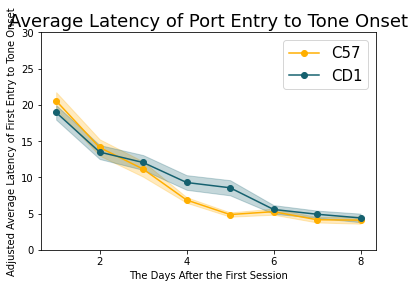

In [27]:

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (13.5,7.5)
plt.rcParams.update({'font.size': 15, 'font.family': ["Arial"]})
# Plotting a line for each subject
for strain in strain_averaged_first_porty_entry_dataframe["strain"].unique():
    # Getting all the rows with the current subject
    strain_df = strain_averaged_first_porty_entry_dataframe[strain_averaged_first_porty_entry_dataframe["strain"] == strain]
    std_df = strain_sem_first_porty_entry_dataframe[strain_sem_first_porty_entry_dataframe["strain"] == strain]

    # Making the dates into days after the first session by subtracting all the dates by the first date
    ax.plot(strain_df["session"], strain_df["latency_adjusted_greater_than_30"], '-o', \
            label=strain, c=strain_to_color[strain])
#     ax.errorbar(strain_df["session"], strain_df["latency_adjusted_greater_than_30"], \
#                 yerr=std_df["latency_adjusted_greater_than_30"], c=strain_to_color[strain])
    ax.fill_between(strain_df["session"], strain_df["latency_adjusted_greater_than_30"]-std_df["latency_adjusted_greater_than_30"], \
                    strain_df["latency_adjusted_greater_than_30"]+std_df["latency_adjusted_greater_than_30"], \
                   alpha=.25, color=strain_to_color[strain])

# Setting the Y-Axis to only plot from 0 to 30 because we adjusted the latency to always be under 30
ax.set_ylim(0, 30)
# Labeling the X/Y Axis and the title
ax.set_xlabel("The Days After the First Session", family="Arial")
ax.set_ylabel("Adjusted Average Latency of First Entry to Tone Onset", family="Arial")
ax.set_title("Average Latency of Port Entry to Tone Onset", family="Arial")
# To show the legend
ax.legend()
file_name = "strain_average_latency_C57_CD1.svg"
plt.savefig(os.path.join(per_strain_output_directory, file_name))

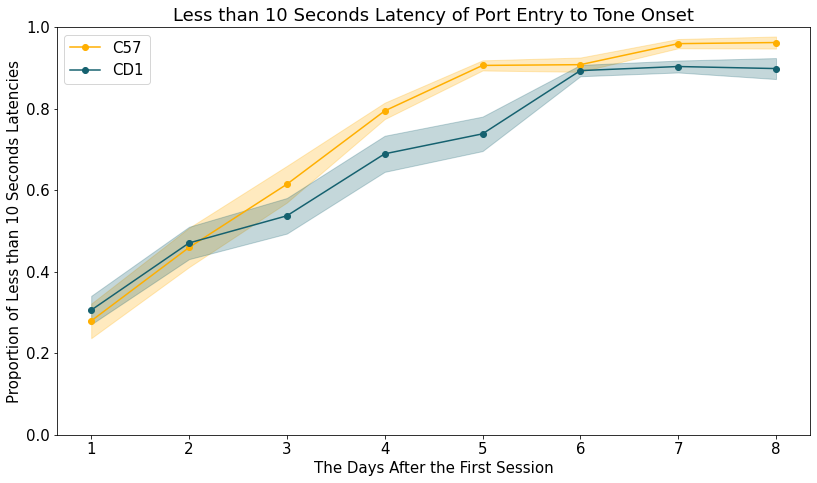

In [28]:

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (13.5,7.5)
plt.rcParams.update({'font.size': 15, 'font.family': ["Arial"]})

# Plotting a line for each subject
for strain in strain_averaged_first_porty_entry_dataframe["strain"].unique():
    # Getting all the rows with the current subject
    strain_df = strain_averaged_first_porty_entry_dataframe[strain_averaged_first_porty_entry_dataframe["strain"] == strain]
    std_df = strain_sem_first_porty_entry_dataframe[strain_sem_first_porty_entry_dataframe["strain"] == strain]

    # Making the dates into days after the first session by subtracting all the dates by the first date
    ax.plot(strain_df["session"], strain_df["overlap_adjusted_latency_less_than_10_seconds"], '-o', \
            label=strain, c=strain_to_color[strain])
#     ax.errorbar(strain_df["session"], strain_df["overlap_adjusted_latency_less_than_10_seconds"], \
#                 yerr=std_df["overlap_adjusted_latency_less_than_10_seconds"], c=strain_to_color[strain])
    ax.fill_between(strain_df["session"], strain_df["overlap_adjusted_latency_less_than_10_seconds"]-std_df["overlap_adjusted_latency_less_than_10_seconds"], \
                    strain_df["overlap_adjusted_latency_less_than_10_seconds"]+std_df["overlap_adjusted_latency_less_than_10_seconds"], \
                   alpha=.25, color=strain_to_color[strain])

# Setting the Y-Axis to only plot from 0 to 30 because we adjusted the latency to always be under 30
# ax.set_ylim(0, 30)
# Labeling the X/Y Axis and the title
ax.set_xlabel("The Days After the First Session", family="Arial")
ax.set_ylabel("Proportion of Less than 10 Seconds Latencies", family="Arial")
ax.set_title("Less than 10 Seconds Latency of Port Entry to Tone Onset", family="Arial")
ax.set_ylim(0, 1)
# To show the legend
ax.legend()
file_name = "strain_less_than_10_seconds_latency_C57_CD1.svg"
plt.savefig(os.path.join(per_strain_output_directory, file_name))

## Exporting the dataframes

In [29]:
all_pilots_grouped_averaged_first_porty_entry_df = all_pilots_grouped_averaged_first_porty_entry_df.reset_index(drop=True)
all_pilots_grouped_averaged_first_porty_entry_df = all_pilots_grouped_averaged_first_porty_entry_df.drop(columns=["Unnamed: 0"], errors="ignore")

In [30]:
all_pilots_grouped_averaged_first_porty_entry_df["subject_with_cage_number"] = all_pilots_grouped_averaged_first_porty_entry_df.apply(lambda x: x["subject"] if pd.isna(x["subject_with_cage_number"]) else x["subject_with_cage_number"], axis=1).astype(str)

In [31]:
all_pilots_grouped_averaged_first_porty_entry_df["subject_with_cage_number"].unique()

array(['1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1 (1)',
       '3.2 (2)', '3.3 (4)', '3.4 (2)', '4.1 (1)', '4.2 (3)', '4.3 (3)',
       '4.4 (4)', '3.1', '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4',
       '5.1', '5.2', '5.3', '5.4', '6.1', '6.2', '6.3', '6.4'],
      dtype=object)

In [32]:
all_pilots_grouped_averaged_first_porty_entry_df = all_pilots_grouped_averaged_first_porty_entry_df.sort_values(["cohort", "cage", "subject_with_cage_number", "session"]).reset_index(drop=True)

In [33]:
all_pilots_grouped_averaged_first_porty_entry_df.head()

,session,subject,current_tone_time,first_port_entry_after_tone,port_exit_after_first_port_entry_after_tone,last_port_entry_before_tone,port_exit_after_last_port_entry_before_tone,latency,latency_adjusted_greater_than_30,overlapping_port_entry_with_tone,latency_adjusted_overlap,adjusted_30_second_latency_less_than_10_seconds_ratio,overlap_adjusted_latency_less_than_10_seconds,cage,strain,cohort,subject_with_cage_number
0,1,1.1,675.676667,717.894667,718.904667,708.214615,708.941538,42.218000,19.980000,0.000000,19.980000,0.333333,0.333333,1,C57,pilot_1,1.1
1,2,1.1,1871.473415,1877.520244,1878.694634,1863.806585,1864.643659,6.046829,6.046829,0.170732,5.638780,0.780488,0.780488,1,C57,pilot_1,1.1
2,3,1.1,1825.635000,1837.172750,1839.731250,1862.612564,1864.153333,11.537750,9.446750,0.175000,8.474500,0.675000,0.700000,1,C57,pilot_1,1.1
3,4,1.1,1871.473415,1877.429756,1886.507073,1863.154390,1867.981951,5.956341,5.956341,0.243902,3.185366,0.829268,0.926829,1,C57,pilot_1,1.1
4,5,1.1,1825.635000,1829.233000,1834.643500,1821.198750,1823.707750,3.598000,3.598000,0.275000,1.964250,0.975000,1.000000,1,C57,pilot_1,1.1


In [34]:
all_pilots_grouped_averaged_first_porty_entry_df.to_csv("./proc/reward_training_all_pilots_per_subject_averaged_latency.csv")